 ### Задача 1. Минимизация гладкой функции

1.Рассмотрим все ту же функцию из задания по линейной алгебре: f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2), но теперь уже на промежутке [1, 30]

2.В первом задании будем искать минимум этой функции на заданном промежутке с помощью scipy.optimize. Разумеется, в дальнейшем вы будете использовать методы оптимизации для более сложных функций, а f(x) мы рассмотрим как удобный учебный пример.

3.Напишите на Питоне функцию, вычисляющую значение f(x) по известному x. Будьте внимательны: не забывайте про то, что по умолчанию в питоне целые числа делятся нацело, и о том, что функции sin и exp нужно импортировать из модуля math.

In [10]:
import numpy as np
def f(x):
    return math.sin(x / 5.0) * math.exp(x / 10.0) + 5.0 * math.exp(-x / 2.0)

xlist = np.arange(1,30, 0.1)

4.Изучите примеры использования scipy.optimize.minimize в документации Scipy  
http://docs.scipy.org/doc/scipy/reference/optimize.html

5.Попробуйте найти минимум, используя стандартные параметры в функции scipy.optimize.minimize (т.е. задав только функцию и начальное приближение). Попробуйте менять начальное приближение и изучить, меняется ли результат.

In [11]:
import scipy.optimize as opt
import math

res_default = opt.minimize(f, 2)
print res_default

      fun: 1.7452682903449388
 hess_inv: array([[5.98752437]])
      jac: array([-2.07126141e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.13627618])


6.Укажите в scipy.optimize.minimize в качестве метода BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения x=2. Градиент функции при этом указывать не нужно – он будет оценен численно. Полученное значение функции в точке минимума - ваш первый ответ по заданию 1, его надо записать с точностью до 2 знака после запятой.

In [12]:
results = {}

res_bfgs = opt.minimize(f, 2, method = "BFGS")
results[0] = str( round(res_bfgs.fun, 2) )

print res_bfgs
print results

      fun: 1.7452682903449388
 hess_inv: array([[5.98752437]])
      jac: array([-2.07126141e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.13627618])
{0: '1.75'}


7.Теперь измените начальное приближение на x=30. Значение функции в точке минимума - ваш второй ответ по заданию 1, его надо записать через пробел после первого, с точностью до 2 знака после запятой.

In [13]:
res_bfgs = opt.minimize(f, 30, method = "BFGS")
print res_bfgs

results[1] = str( round(res_bfgs.fun, 2) )

      fun: -11.898894665981285
 hess_inv: array([[1.67932484]])
      jac: array([2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.88019339])


In [14]:
file_obj = open('submission-1.txt', 'w')
file_obj.write(results[0] + " " + results[1])
file_obj.close
print results

{0: '1.75', 1: '-11.9'}


In [15]:
! cat submission-1.txt

1.75 -11.9

8.Стоит обдумать полученный результат. Почему ответ отличается в зависимости от начального приближения? Если нарисовать график функции (например, как это делалось в видео, где мы знакомились с Numpy, Scipy и Matplotlib), можно увидеть, в какие именно минимумы мы попали. В самом деле, градиентные методы обычно не решают задачу глобальной оптимизации, поэтому результаты работы ожидаемые и вполне корректные.

In [16]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show>

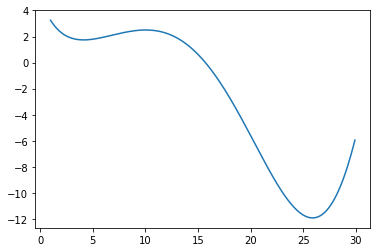

In [17]:
plt.plot(xlist, [f(x) for x in xlist])
plt.show